# Get MF-DFA on starling amplitude envelope
#### Date: 8/31/2022, JX
> Use MF-DFA on /mnt/cube/j8xing/starling_rhythm_mfdfa/data/starling_zenodo_2019_amp_envs.pickle

In [1]:
from starling_rhythm.utils.paths import PROCESSED_DIR

## Import dataframe

In [2]:
import pandas as pd

In [3]:
SAVE_PATH = PROCESSED_DIR / 'starling_zenodo_2019_amp_envs.pickle'
ae_df = pd.read_pickle(SAVE_PATH)

In [4]:
ae_df.head()

,bID,wav_file,amp_env
0,b1053,2017-11-13_16-29-28-410000.wav,"[0.0018830217886716127, 0.0419728122651577, 0...."
1,b1053,2017-11-16_15-17-52-520000.wav,"[0.00025263827410526574, 0.009912424720823765,..."
2,b1053,2017-11-20_14-15-32-360000.wav,"[0.0009369360050186515, 0.012841599062085152, ..."
3,b1053,2017-11-20_12-40-56-130000.wav,"[0.0005382103845477104, 0.017500486224889755, ..."
4,b1053,2017-11-15_15-30-01-000000.wav,"[0.005851297173649073, 0.18658912181854248, 0...."


In [5]:
import matplotlib.pyplot as plt
import numpy as np

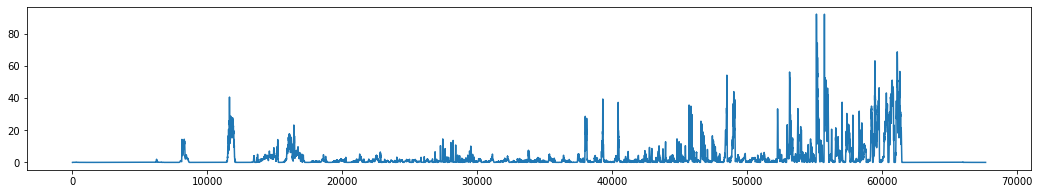

In [6]:
plt.figure(figsize = [18, 3])
plt.plot(ae_df.amp_env.values[1])

/tmp/ipykernel_10155/1122329073.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  spl_transformed = 20 * np.log((ae_df.amp_env.values[1]/(2*(10**(-5)))), where = ae_df.amp_env.values != 0)
/tmp/ipykernel_10155/1122329073.py:2: RuntimeWarning: divide by zero encountered in log
  spl_transformed = 20 * np.log((ae_df.amp_env.values[1]/(2*(10**(-5)))), where = ae_df.amp_env.values != 0)


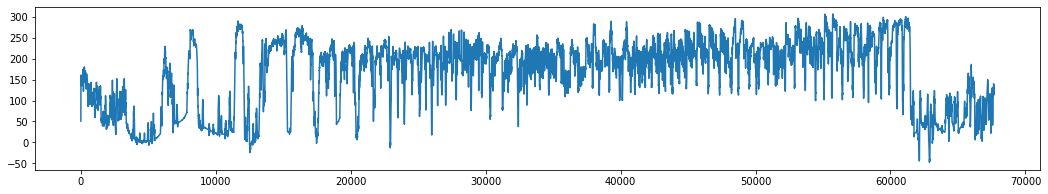

In [14]:
plt.figure(figsize = [18, 3])
spl_transformed = 20 * np.log((ae_df.amp_env.values[1]/(2*(10**(-5)))), where = ae_df.amp_env.values != 0)
plt.plot(spl_transformed)

In [13]:
ae_df.amp_env == 0

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [8]:
spl_transformed

array([ 50.72452891, 124.11623996, 136.50745895, ..., 121.04581833,
       115.19470372,         -inf])

frequency filter?

## Pull out MF-DFA

> 1. Filter time-series to have compact support
2. Determine time windows

In [5]:
import numpy as np
from starling_rhythm.mfdfa import hurst_expo
from joblib import Parallel, delayed
from tqdm.autonotebook import tqdm

/home/AD/j8xing/anaconda3/envs/starling_rhythm/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
n_jobs = 36 ## set up joblib parameters
verbose = 0

In [7]:
with Parallel(n_jobs = n_jobs, verbose = verbose) as parallel:
    h_expos = parallel(
        delayed(hurst_expo)(
            amp_env
        ) 
        for amp_env in tqdm(ae_df.amp_env.values, desc = "Retrieving Hurst Exponents for all Amplitude Envelopes.")
    )

Retrieving Hurst Exponents for all Amplitude Envelopes.: 100%|██████████| 10499/10499 [14:59<00:00, 11.67it/s]


In [8]:
## Get MF_range
MF_range = []
for h_expo in h_expos:
    MF_range.append(max(h_expo) - min(h_expo))

In [9]:
ae_df['h_expo'] = h_expos
ae_df['MF_range'] = MF_range

In [10]:
ae_df

,bID,wav_file,amp_env,h_expo,MF_range
0,b1053,2017-11-13_16-29-28-410000.wav,"[0.0018830217886716127, 0.0419728122651577, 0....","[1.6608106807319716, 1.2355325272375295, 1.064...",0.890848
1,b1053,2017-11-16_15-17-52-520000.wav,"[0.00025263827410526574, 0.009912424720823765,...","[1.301428090197107, 1.2128418979013935, 1.1532...",0.324266
2,b1053,2017-11-20_14-15-32-360000.wav,"[0.0009369360050186515, 0.012841599062085152, ...","[1.3043399697999902, 1.194764969902378, 1.1147...",0.393290
3,b1053,2017-11-20_12-40-56-130000.wav,"[0.0005382103845477104, 0.017500486224889755, ...","[1.2940395480733704, 1.1808883822981484, 1.106...",0.385042
4,b1053,2017-11-15_15-30-01-000000.wav,"[0.005851297173649073, 0.18658912181854248, 0....","[1.2587933350588136, 1.1813894943846186, 1.117...",0.338247
...,...,...,...,...,...
10495,b1145,2017-11-09_13-26-01-740000.wav,"[0.00046988570829853415, 0.005906305275857449,...","[1.3015079002544736, 1.1534304613867206, 1.055...",0.504895
10496,b1145,2017-11-07_17-30-06-880000.wav,"[0.0010995561024174094, 0.023808063939213753, ...","[1.3329625989909468, 1.204593327233485, 1.1091...",0.523365
10497,b1145,2017-11-09_09-34-49-120000.wav,"[0.004488207399845123, 0.16635635495185852, 0....","[1.3980963880706936, 1.2355045670491165, 1.116...",0.593336
10498,b1145,2017-11-09_09-26-04-120000.wav,"[0.0007589902961626649, 0.01674412377178669, 0...","[1.3890820011093497, 1.2027418827213219, 1.080...",0.581849


## Pickle dataframe

In [11]:
from starling_rhythm.utils.paths import PROCESSED_DIR, ensure_dir

In [12]:
SAVE_PATH = PROCESSED_DIR / 'starling_zenodo_2019_amp_envs_MF.pickle'
ensure_dir(SAVE_PATH)

In [13]:
ae_df.to_pickle(SAVE_PATH)